In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("code")
import numpy as np
import matplotlib.pyplot as plt
from keras_tqdm import TQDMNotebookCallback
from npm3dGenerator_tree import NPM3DGenerator, NPM3DGenerator_full
from models import build_point_net, save_model, load_model
import utils_training as u_t

Using TensorFlow backend.


In [2]:
training_dataset = NPM3DGenerator_full(paths_to_keep = [1, 2, 3], sample_uniformly_from_classes = True)
validation_dataset = NPM3DGenerator_full(paths_to_keep = [0], sample_uniformly_from_classes = True, evaluation = True)

../Benchmark/training_10_classes_subsampled_2\Lille1_2_tree.joblib
LOADING TREE
DONE
MODIFIYING PATHS ../Benchmark/training_10_classes_subsampled_2\Lille1_2.ply
LOADING NORMALS ../Benchmark/training_10_classes_subsampled_2\Lille1_2_normals.npy
../Benchmark/training_10_classes_subsampled_2\Lille2_tree.joblib
LOADING TREE
DONE
MODIFIYING PATHS ../Benchmark/training_10_classes_subsampled_2\Lille2.ply
LOADING NORMALS ../Benchmark/training_10_classes_subsampled_2\Lille2_normals.npy
../Benchmark/training_10_classes_subsampled_2\Paris_tree.joblib
LOADING TREE
DONE
MODIFIYING PATHS ../Benchmark/training_10_classes_subsampled_2\Paris.ply
LOADING NORMALS ../Benchmark/training_10_classes_subsampled_2\Paris_normals.npy



../Benchmark/training_10_classes_subsampled_2\Lille1_1_tree.joblib
LOADING TREE
DONE
MODIFIYING PATHS ../Benchmark/training_10_classes_subsampled_2\Lille1_1.ply
LOADING NORMALS ../Benchmark/training_10_classes_subsampled_2\Lille1_1_normals.npy



In [4]:
miou_metric = u_t.mIoU(training_dataset.n_classes)

#model = build_point_net(input_shape = (training_dataset.n_points, training_dataset.n_channels),
 #                       output_shape = training_dataset.n_classes)
model = load_model("trained_1epochs_notuniform_{}_{}_{}".format(training_dataset.n_points, training_dataset.n_channels, training_dataset.n_classes))
model.compile("adam", u_t.my_categorical_crossentropy, metrics = ["accuracy", miou_metric.miou])
#model.summary()

Loaded model from disk


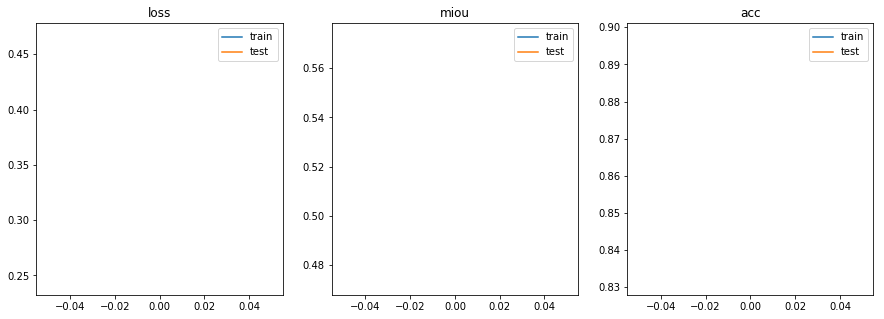

In [5]:
n_epochs = 1
history = model.fit_generator(training_dataset, epochs = n_epochs,
                              validation_data = validation_dataset,
                              class_weight = training_dataset.class_weight,
                              verbose = 0, callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)])
u_t.plot_history(history)

In [6]:
save_model(model, "trained_{}epochs_uniform_{}_{}_{}".format(n_epochs, training_dataset.n_points, training_dataset.n_channels, training_dataset.n_classes))

Saved model to disk


In [ ]:
test_dataset = NPM3DGenerator_full(input_dir = "../Benchmark/test_10_classes_subsampled_2", train = False)
probas, predictions = test_dataset.predict_point_cloud(model, index = 0)
probas, predictions = test_dataset.predict_point_cloud(model, index = 1)
probas, predictions = test_dataset.predict_point_cloud(model, index = 2)

../Benchmark/test_10_classes_subsampled_2\ajaccio_2_tree.joblib
LOADING TREE
DONE
MODIFIYING PATHS ../Benchmark/test_10_classes_subsampled_2\ajaccio_2.ply
LOADING NORMALS ../Benchmark/test_10_classes_subsampled_2\ajaccio_2_normals.npy
../Benchmark/test_10_classes_subsampled_2\ajaccio_57_tree.joblib
LOADING TREE
DONE
MODIFIYING PATHS ../Benchmark/test_10_classes_subsampled_2\ajaccio_57.ply
LOADING NORMALS ../Benchmark/test_10_classes_subsampled_2\ajaccio_57_normals.npy
../Benchmark/test_10_classes_subsampled_2\dijon_9_tree.joblib
LOADING TREE
DONE
MODIFIYING PATHS ../Benchmark/test_10_classes_subsampled_2\dijon_9.ply
LOADING NORMALS ../Benchmark/test_10_classes_subsampled_2\dijon_9_normals.npy

